#### ***6. Analyse tweets to show a comparison of the engagement rate for tweets with app opens versus tweets without app opens. Include only tweets posted on weekdays and this graph should work only between 12PM IST to 6PM IST and 7 AM to 11AM apart from that time we should not show this graph in dashboard itself and the tweet impression should be even number and tweet date should be odd number as well as tweet character count should be above 30 and need to remove tweet word which has letter 'D'.***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- File Paths ---
file_path = "../twitter.csv"
output_plot_path = "../Plots/task_06_app_opens_engagement.png"

In [2]:
# --- Data Loading ---
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

In [4]:
# --- Data Preprocessing and Filtering ---

# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['date'], dayfirst=True)

In [5]:
# Filter 1: Weekdays (Monday=0, Sunday=6) and Time (9 AM to 5 PM)
# df = df[(df['Date'].dt.weekday < 5) & (df['Date'].dt.hour >= 9) & (df['Date'].dt.hour < 17)]
df = df[(df['Date'].dt.weekday < 5)]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 0 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1036 non-null   int64         
 1   Tweet                1036 non-null   object        
 2   id                   1036 non-null   float64       
 3   time                 1036 non-null   object        
 4   impressions          1036 non-null   int64         
 5   engagements          1036 non-null   int64         
 6   engagement rate      1036 non-null   float64       
 7   retweets             1036 non-null   int64         
 8   replies              1036 non-null   int64         
 9   likes                1036 non-null   int64         
 10  user profile clicks  1036 non-null   int64         
 11  url clicks           1036 non-null   int64         
 12  hashtag clicks       1036 non-null   int64         
 13  detail expands       1036 non-null   i

In [8]:
# Filter 2: Tweet impressions must be an even number
df = df[df['impressions'] % 2 == 0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 1 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           532 non-null    int64         
 1   Tweet                532 non-null    object        
 2   id                   532 non-null    float64       
 3   time                 532 non-null    object        
 4   impressions          532 non-null    int64         
 5   engagements          532 non-null    int64         
 6   engagement rate      532 non-null    float64       
 7   retweets             532 non-null    int64         
 8   replies              532 non-null    int64         
 9   likes                532 non-null    int64         
 10  user profile clicks  532 non-null    int64         
 11  url clicks           532 non-null    int64         
 12  hashtag clicks       532 non-null    int64         
 13  detail expands       532 non-null    in

In [10]:
# Filter 3: Tweet date (day of the month) must be an odd number
df = df[df['Date'].dt.day % 2 != 0]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 35 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           290 non-null    int64         
 1   Tweet                290 non-null    object        
 2   id                   290 non-null    float64       
 3   time                 290 non-null    object        
 4   impressions          290 non-null    int64         
 5   engagements          290 non-null    int64         
 6   engagement rate      290 non-null    float64       
 7   retweets             290 non-null    int64         
 8   replies              290 non-null    int64         
 9   likes                290 non-null    int64         
 10  user profile clicks  290 non-null    int64         
 11  url clicks           290 non-null    int64         
 12  hashtag clicks       290 non-null    int64         
 13  detail expands       290 non-null    i

In [12]:
# Filter 4: Tweet character count must be above 30
df['character_count'] = df['Tweet'].str.len()
df = df[df['character_count'] > 30]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 35 to 1165
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           290 non-null    int64         
 1   Tweet                290 non-null    object        
 2   id                   290 non-null    float64       
 3   time                 290 non-null    object        
 4   impressions          290 non-null    int64         
 5   engagements          290 non-null    int64         
 6   engagement rate      290 non-null    float64       
 7   retweets             290 non-null    int64         
 8   replies              290 non-null    int64         
 9   likes                290 non-null    int64         
 10  user profile clicks  290 non-null    int64         
 11  url clicks           290 non-null    int64         
 12  hashtag clicks       290 non-null    int64         
 13  detail expands       290 non-null    i

In [14]:
# Filter 5: Remove tweets containing the letter 'D'
df = df[~df['Tweet'].str.contains('d', case=False, na=False)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 38 to 929
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           8 non-null      int64         
 1   Tweet                8 non-null      object        
 2   id                   8 non-null      float64       
 3   time                 8 non-null      object        
 4   impressions          8 non-null      int64         
 5   engagements          8 non-null      int64         
 6   engagement rate      8 non-null      float64       
 7   retweets             8 non-null      int64         
 8   replies              8 non-null      int64         
 9   likes                8 non-null      int64         
 10  user profile clicks  8 non-null      int64         
 11  url clicks           8 non-null      int64         
 12  hashtag clicks       8 non-null      int64         
 13  detail expands       8 non-null      int6

In [16]:
# --- Analysis ---

# Calculate engagement rate
df['engagement_rate'] = (df['likes'] + df['retweets']) / df['impressions']
df['engagement_rate'] = df['engagement_rate'].replace([float('inf'), -float('inf')], 0) # Replace inf with 0

In [17]:
# Categorize tweets based on detail expands
df['has_detail_expands'] = df['detail expands'] > 0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 38 to 929
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           8 non-null      int64         
 1   Tweet                8 non-null      object        
 2   id                   8 non-null      float64       
 3   time                 8 non-null      object        
 4   impressions          8 non-null      int64         
 5   engagements          8 non-null      int64         
 6   engagement rate      8 non-null      float64       
 7   retweets             8 non-null      int64         
 8   replies              8 non-null      int64         
 9   likes                8 non-null      int64         
 10  user profile clicks  8 non-null      int64         
 11  url clicks           8 non-null      int64         
 12  hashtag clicks       8 non-null      int64         
 13  detail expands       8 non-null      int6

In [19]:
# Group by the 'has_detail_expands' category and calculate the mean engagement rate
engagement_comparison = df.groupby('has_detail_expands')['engagement_rate'].mean().reset_index()
engagement_comparison['has_detail_expands'] = engagement_comparison['has_detail_expands'].map({True: 'With Detail Expands', False: 'Without Detail Expands'})

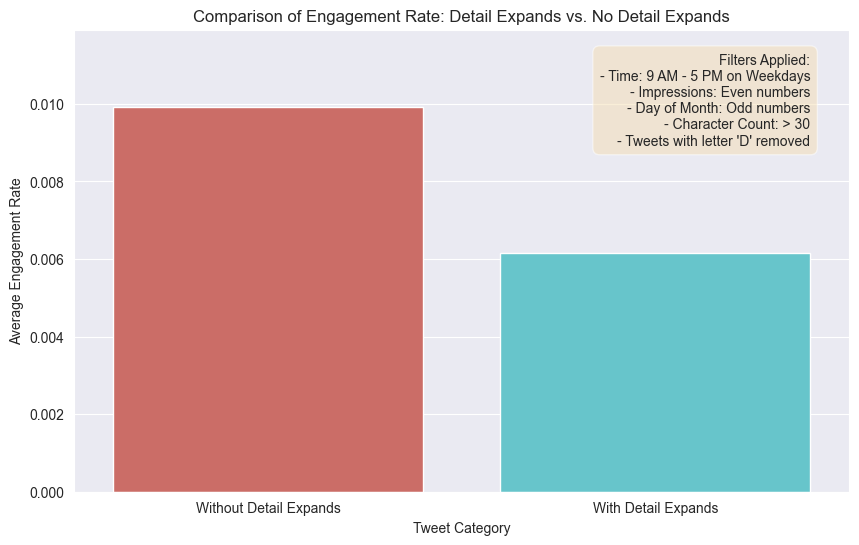

Analysis complete. Plot saved to ../Plots/task_06_app_opens_engagement.png


In [23]:
# --- Visualization ---

plt.figure(figsize=(10, 6))
sns.barplot(x='has_detail_expands', y='engagement_rate', hue='has_detail_expands',
            data=engagement_comparison, palette='hls', legend=False)

plt.title('Comparison of Engagement Rate: Detail Expands vs. No Detail Expands')
plt.xlabel('Tweet Category')
plt.ylabel('Average Engagement Rate')
plt.ylim(0, engagement_comparison['engagement_rate'].max() * 1.2) # Adjust y-axis for better visualization

# Add filter descriptions to the plot
filters_description = (
    "Filters Applied:\n"
    "- Time: 9 AM - 5 PM on Weekdays\n"
    "- Impressions: Even numbers\n"
    "- Day of Month: Odd numbers\n"
    "- Character Count: > 30\n"
    "- Tweets with letter 'D' removed"
)
plt.text(0.95, 0.95, filters_description,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# --- Save and Show Plot ---
# plt.savefig(output_plot_path, bbox_inches='tight')
plt.show()

print(f"Analysis complete. Plot saved to {output_plot_path}")
